In [2]:
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error, accuracy_score  
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split  


# Reading data

In [3]:

combined_data_path = '../EDA_kaggle/combined_data.csv'
combined_data = pd.read_csv(combined_data_path)


print(combined_data.head())

   Age  BusinessTravel  DistanceFromHome  Education  EmployeeNumber  \
0   37               1                 1          4              77   
1   54               2                 1          4            1245   
2   34               2                 7          3             147   
3   39               1                 1          1            1026   
4   28               2                 1          3            1111   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  JobSatisfaction  \
0                        1       0               2         2                3   
1                        4       1               3         3                3   
2                        1       0               1         2                3   
3                        4       1               2         4                4   
4                        1       0               2         1                2   

   ...  JobRole_Human Resources  JobRole_Laboratory Technician  \
0  ...              

In [4]:
combined_data.columns

Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Label', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_

# Fitting the model

In [27]:

X = combined_data.drop(columns=['Label'])
y = combined_data['Label']

In [29]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  

# Train the model
model.fit(X_train, y_train)  

# Make predictions
y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9630
Precision: 0.9710
Recall: 0.7976
F1 Score: 0.8758


#  Select Features

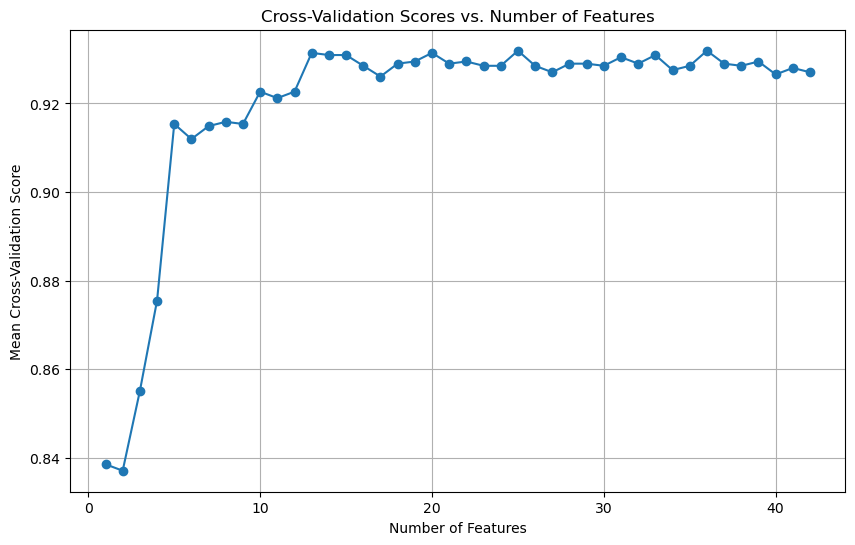

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

scores = []


for i in range(1, X.shape[1] + 1):
    X_temp = X_train[:, :i]  
    score = cross_val_score(model, X_temp, y_train, cv=5).mean()
    scores.append((i, score))

scores_df = pd.DataFrame(scores, columns=['Number of Features', 'Mean Cross-Validation Score'])

plt.figure(figsize=(10, 6))
plt.plot(scores_df['Number of Features'], scores_df['Mean Cross-Validation Score'], marker='o')
plt.title('Cross-Validation Scores vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-Validation Score')
plt.grid(True)
plt.show()

#### So Select the top 13 important features 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

N = 13
significant_features = feature_importances.head(N)['Feature'].tolist()

print("Top 13 Significant Features:")
print(significant_features)

X_selected = X[significant_features]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Top 13 Significant Features:
['MonthlyIncome', 'Age', 'OverTime', 'EmployeeNumber', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike', 'JobSatisfaction', 'NumCompaniesWorked', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'YearsSinceLastPromotion']
Accuracy: 0.9669
Precision: 0.9589
Recall: 0.8333
F1 Score: 0.8917


## Addressing data imbalance

In [33]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled_selected, y)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)  
  

model.fit(X_train_res, y_train_res)  
  

y_pred_res = model.predict(X_test_res)  
  
accuracy = accuracy_score(y_test_res, y_pred_res)  
precision = precision_score(y_test_res, y_pred_res, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test_res, y_pred_res, average='binary')
f1 = f1_score(y_test_res, y_pred_res, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.9755
Recall: 0.9827
F1 Score: 0.9791
Accuracy: 0.9803


In [34]:

model = RandomForestClassifier(random_state=42, class_weight='balanced')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
  
model.fit(X_train, y_train)  
  

y_pred = model.predict(X_test)  
  
if isinstance(model, RandomForestRegressor):  
    mse = mean_squared_error(y_test, y_pred)  
    print(f'Mean Squared Error: {mse}')  
else:  
    accuracy = accuracy_score(y_test, y_pred)  
    precision = precision_score(y_test, y_pred, average='binary') 
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Accuracy: {accuracy:.4f}')

Precision: 0.9692
Recall: 0.7500
F1 Score: 0.8456
Accuracy: 0.9553
